<a href="https://colab.research.google.com/github/geo-tp/Keras-Colaboratory-Models/blob/main/creature_classlevelstats_formulas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# A way to find formulas for creatures_classlevelstats

In [4]:
import numpy as np
import operator
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split


# Heath for unit_class 1
health_values = np.array([
        42, 55, 71, 86, 102, 120, 137, 156, 176, 198, 222, 247, 273, 300,
        328, 356, 386, 417, 449, 484, 521, 562, 605, 651, 699, 750, 800,
        853, 905, 955, 1006, 1057, 1110, 1163, 1220, 1277, 1336, 1395, 1459,
        1524, 1585, 1651, 1716, 1782, 1848, 1919, 1990, 2062, 2138, 2215,
        2292, 2371, 2453, 2533, 2614, 2699, 2784, 2871, 2961, 3052, 3144,
        3237, 3331
])


# Levels for each health value
levels = np.arange(1, len(health_values) + 1)

# Reshape health values for scikit-learn
X = levels.reshape(-1, 1)  # Reshape so that each level is an individual feature
y = health_values  # The target values

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create polynomial features
degree = 4  # The degree of the polynomial
polynomial_features = PolynomialFeatures(degree=degree)
X_poly_train = polynomial_features.fit_transform(X_train)

# Train the linear regression model
model = LinearRegression()
model.fit(X_poly_train, y_train)

# Predict on the test data
X_poly_test = polynomial_features.transform(X_test)
y_pred = model.predict(X_poly_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('MSE:', mse)
print('R^2:', r2)

# To reconstruct the polynomial formula
formula = "y = "
for i in range(degree + 1):
    if i == 0:
        formula += f"{model.intercept_:.2f}"
    else:
        formula += f" + {model.coef_[i]:.2f} * x^{i}"
print('Estimated polynomial formula:', formula)

MSE: 42.40987420892581
R^2: 0.999969533068481
Estimated polynomial formula: y = 56.66 + 3.20 * x^1 + 1.10 * x^2 + -0.01 * x^3 + 0.00 * x^4


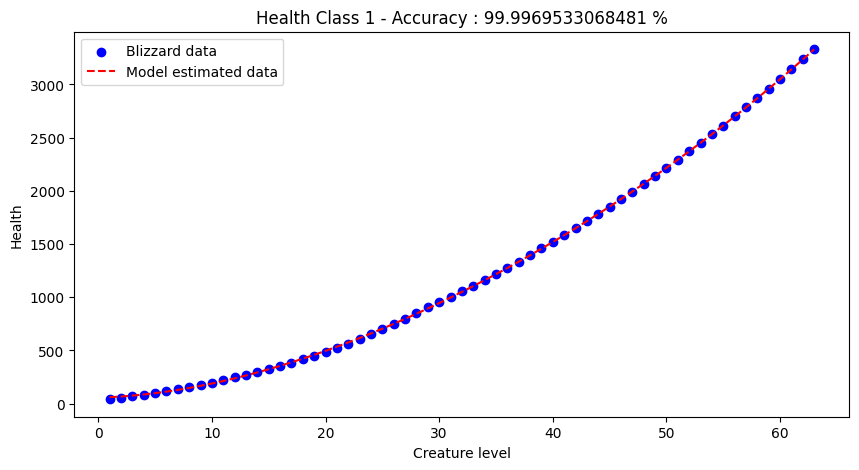

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# Coefficients from the model
model_coefficients = model.coef_.tolist()[1:] # first element is always zero
model_coefficients.reverse() # order desc
constant_term = model.intercept_

# Preparing the model estimated values
# We use the np.polyval function which evaluates a polynomial at the given points.
# The list of coefficients is provided from the highest power to the lowest.
y_pred = np.polyval(model_coefficients + [constant_term], levels)

# Graph creation
plt.figure(figsize=(10, 5))

# Blizz data
plt.scatter(levels, health_values, color='blue', linestyle='-', label='Blizzard data')

# Predicted data
plt.plot(levels, y_pred, color='red', linestyle='--', label='Model estimated data')

# Titles
plt.title(f'Health Class 1 - Accuracy : {r2 * 100} %')
plt.xlabel('Creature level')
plt.ylabel('Health')
plt.legend()

# Show graph
plt.show()